In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2025-06-04 12:45:23.057664: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-04 12:45:23.081738: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Loading data

Train shape: (60000, 28, 28)
Test shape:  (10000, 28, 28)


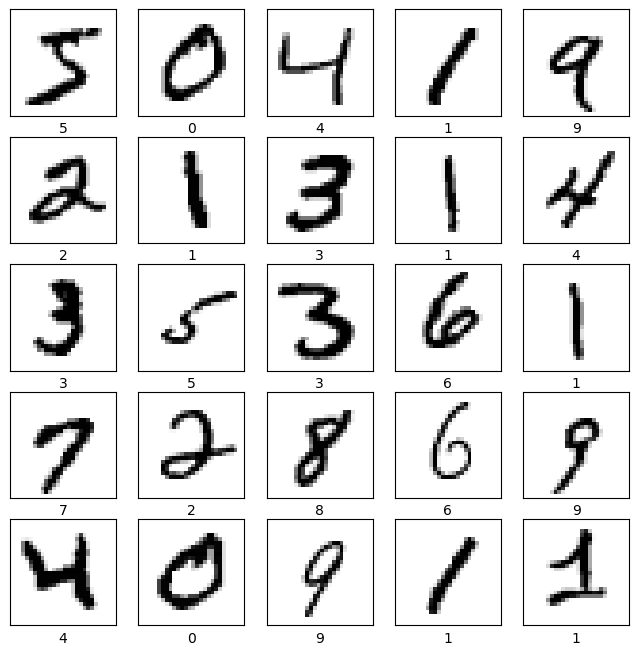

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
print('Train shape:', train_images.shape)
print('Test shape: ', test_images.shape)
plt.figure(figsize=[8, 8])
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

# Formating data

In [3]:
def format(images):
    if len(images.shape) == 2:
        return images
    images = images.astype('float32')
    images = images.reshape(*images.shape,1)
    pixel_count = images.shape[1] * images.shape[2]
    images = images.reshape(images.shape[0], pixel_count)
    images = images / 255

    return images

train_images = format(train_images)
test_images = format(test_images)
test_images.shape

(10000, 784)

# One-hot encoding

In [4]:
num_classes = 10
display(test_labels[:5])
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)
display(test_labels[:5])

array([7, 2, 1, 0, 4], dtype=uint8)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

# Data shuffling

In [5]:

ns = train_images.shape[0]
np.random.seed()
shuffle_index = np.random.permutation(ns)
train_images, train_labels = train_images[shuffle_index, :], train_labels[shuffle_index,]
print(train_images.shape)

(60000, 784)


# Data Split

In [6]:
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels)
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_val:  ', x_val.shape)
print('y_val:  ', y_val.shape)

x_train: (45000, 784)
y_train: (45000, 10)
x_val:   (15000, 784)
y_val:   (15000, 10)


In [7]:
from src.initializers import heNormal
from src.layers import Dense, Input
from src.models import Sequential
from src.optimizers import RMSProp
from src.activations import relu, softmax

In [8]:
model = Sequential(
    [
        Input(784),
        Dense(256, activation=relu, initializer=heNormal),
        Dense(128, activation=relu, initializer=heNormal),
        Dense(10, activation=softmax),
    ]
)

print(f"Parameter count: {model.parameter_count():,}")

history = model.fit(
    x_train,
    y_train,
    validation=(x_val, y_val),
    optimizer=RMSProp(learning_rate=0.00001),
    epochs=100,
    batch_size=128,
    early_stop=("val_accuracy", 0.001, 4),
)

Parameter count: 850,586
Epoch 0/100  - loss: 0.5978 - accuracy: 0.1406 - val_loss: 0.5962 - val_accuracy: 0.1419
Epoch 1/100  - loss: 0.1922 - accuracy: 0.6010 - val_loss: 0.1923 - val_accuracy: 0.5982
Epoch 2/100  - loss: 0.1183 - accuracy: 0.7670 - val_loss: 0.1183 - val_accuracy: 0.7685
Epoch 3/100  - loss: 0.09040 - accuracy: 0.8291 - val_loss: 0.09054 - val_accuracy: 0.8286
Epoch 4/100  - loss: 0.07582 - accuracy: 0.8602 - val_loss: 0.07604 - val_accuracy: 0.8590
Epoch 5/100  - loss: 0.06667 - accuracy: 0.8786 - val_loss: 0.06705 - val_accuracy: 0.8757
Epoch 6/100  - loss: 0.06025 - accuracy: 0.8911 - val_loss: 0.06083 - val_accuracy: 0.8877
Epoch 7/100  - loss: 0.05532 - accuracy: 0.9010 - val_loss: 0.05613 - val_accuracy: 0.8967
Epoch 8/100  - loss: 0.05135 - accuracy: 0.9084 - val_loss: 0.05241 - val_accuracy: 0.9044
Epoch 9/100  - loss: 0.04803 - accuracy: 0.9153 - val_loss: 0.04934 - val_accuracy: 0.9103
Epoch 10/100  - loss: 0.04520 - accuracy: 0.9210 - val_loss: 0.04678 - 

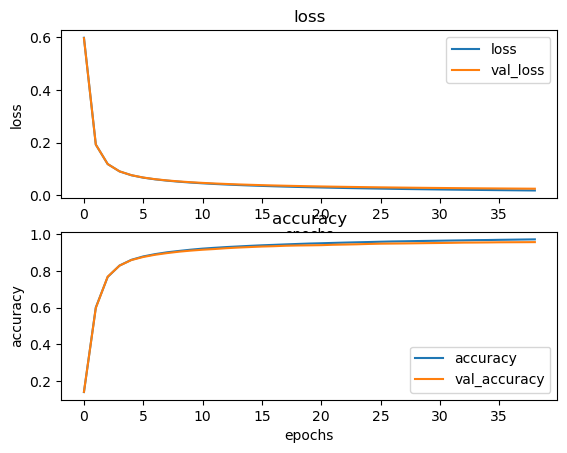

In [9]:
plt.subplot(211)
plt.title("loss")
plt.plot(history["loss"])
plt.plot(history["val_loss"])
plt.legend(["loss", "val_loss"])
plt.ylabel("loss")
plt.xlabel("epochs")

plt.subplot(212)
plt.title("accuracy")
plt.plot(history["accuracy"])
plt.plot(history["val_accuracy"])
plt.legend(["accuracy", "val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epochs");

# Model Evaluation

In [10]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

Examples count: 10000
Accuracy: 95.60%


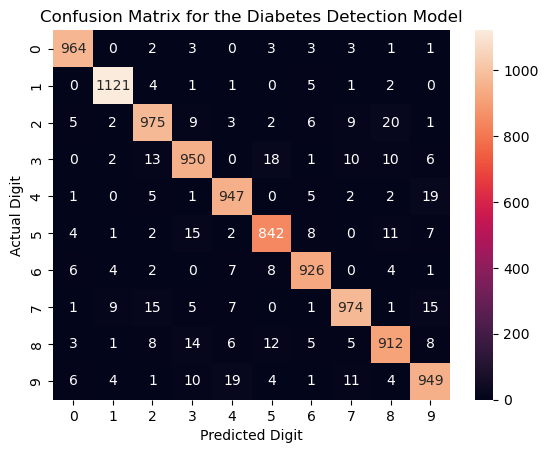

In [12]:
y = test_labels
x = test_images
y_pred = model(x)

y = [np.argmax(q) for q in y]
y_pred = [np.argmax(q) for q in y_pred]

print(f"Examples count: {x.shape[0]}")
print(f"Accuracy: {accuracy_score(y,y_pred):.2%}")

conf = confusion_matrix(y, y_pred)
ax = sns.heatmap(conf, annot=True, fmt='d', )
ax.set_xlabel("Predicted Digit")
ax.set_ylabel("Actual Digit")
ax.set_title("Confusion Matrix for the Diabetes Detection Model");